<a href="https://colab.research.google.com/github/Nora-Anyidoho/Projects/blob/main/Analysis%20of%20Customer%20Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Project by Nora Anyidoho and Abena Agyemang Gyasi
```
# **CUSTOMER CHURN ANALYSIS FOR A BANK**

# **Problem Statement**

The problem statement revolves around analyzing customer churn for a bank. The objective is to identify patterns or factors that contribute to customer churn and potentially predict future churn. This analysis can help the bank to implement strategies to retain customer

### Goal

The goal is to conduct a comprehensive data analysis that includes checking for missing values, handling duplications, performing EDA, and possibly building predictive models if the project requires it.

### Data Dictionary

- id: A unique identifier for the row.<br>
- CustomerId: A unique identifier for the customer.<br>
- Surname: The last name of the customer.<br>
- CreditScore: The credit score of the customer.<br>
- Geography: The country of the customer.<br>
- Gender: The gender of the customer.<br>
- Age: The age of the customer.<br>
- Tenure: The number of years the customer has been with the bank.<br>
- Balance: The bank balance of the customer.<br>
- NumOfProducts: The number of products the customer has with the bank.<br>
- HasCrCard: Indicates whether the customer has a credit card (1) or not (0).<br>
- IsActiveMember: Indicates whether the customer is an active member (1) or not (0).<br>
- EstimatedSalary: The estimated salary of the customer.<br>
- Exited: Indicates whether the customer exited (1) or not (0).<br>

### Dataset Source

[Bank Churn Dataset](https://www.kaggle.com/competitions/playground-series-s4e1/data)

# **Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner notebook presentation
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Set option to display all columns
pd.set_option('display.max_columns', None)

## **Preliminary Steps in Python**

Let's start by loading the datasets, checking for missing values, and identifying duplications

In [ ]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
# Display the first few rows of the train dataset
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


#### Training Dataset

It contains columns like CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, and Exited (which indicates whether the customer has churned).
There are various data types present, including numerical and categorical features.

In [ ]:
# check first dimension of train data set
train_df.shape


(165034, 14)

There are 14 columns and 165,034 rows in the training dataset

In [ ]:
test_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


#### Test Dataset

The test dataset includes similar features as the training dataset except for the Exited column, which is presumably what we need to predict.
It also contains both numerical and categorical data.

In [ ]:
# check first dimension of test data set
test_df.shape

(110023, 13)

There are 13 columns and 110,023 rows in the training dataset

In [ ]:
# Basic information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In the datset there are 6 Integer datatype, 5 Float datatype and 3 Object datatype

In [ ]:
#checking unique values in different variables
unique_values = {}
for col in train_df.columns:
    unique_values[col] = train_df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
id,165034
CustomerId,23221
Surname,2797
CreditScore,457
Geography,3
Gender,2
Age,71
Tenure,11
Balance,30075
NumOfProducts,4


In [ ]:
# check duplicates
train_df.duplicated().sum()

0

In [ ]:
# Check for missing values
train_df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no duplicates nor missing values

In [ ]:
# Create a copy of the dataframe
data = train_df.copy()

In [ ]:
# Dropping 'id' and 'CustomerId' from the train_df
data = data.drop(['id', 'CustomerId', 'Surname'], axis=1)

In [ ]:
# Sanity check
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
for col in data:
  print(data[col].value_counts())
  print("-" * 50)

850    2532
678    2299
684    1718
667    1658
705    1605
       ... 
419       1
386       1
358       1
423       1
373       1
Name: CreditScore, Length: 457, dtype: int64
--------------------------------------------------
France     94215
Spain      36213
Germany    34606
Name: Geography, dtype: int64
--------------------------------------------------
Male      93150
Female    71884
Name: Gender, dtype: int64
--------------------------------------------------
37.00    9255
38.00    9246
35.00    9118
34.00    8625
36.00    8556
         ... 
84.00       4
83.00       3
85.00       3
36.44       1
32.34       1
Name: Age, Length: 71, dtype: int64
--------------------------------------------------
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: Tenure, dtype: int64
--------------------------------------------------
0.00         89648
124577.33       88
127864.40       64
122314.50       63
129

In [ ]:
# Summary statistics for the train dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,165034.0,656.454373,80.103340,350.00,597.00,659.0,710.0000,850.00
Age,165034.0,38.125888,8.867205,18.00,32.00,37.0,42.0000,92.00
Tenure,165034.0,5.020353,2.806159,0.00,3.00,5.0,7.0000,10.00
Balance,165034.0,55478.086689,62817.663278,0.00,0.00,0.0,119939.5175,250898.09
NumOfProducts,165034.0,1.554455,0.547154,1.00,1.00,2.0,2.0000,4.00
HasCrCard,165034.0,0.753954,0.430707,0.00,1.00,1.0,1.0000,1.00
IsActiveMember,165034.0,0.497770,0.499997,0.00,0.00,0.0,1.0000,1.00
EstimatedSalary,165034.0,112574.822734,50292.865585,11.58,74637.57,117948.0,155152.4675,199992.48
Exited,165034.0,0.211599,0.408443,0.00,0.00,0.0,0.0000,1.00


#### Descriptive Statistics

- CreditScore: Ranges from 350 to 850 with a mean score of approximately 656.<br>
- Age: Customers' ages range from 18 to 92 years, with a mean age of around 38 years. This suggests a wide diversity in the bank's customer base.<br>
- Tenure: Varies from 0 to 10 years, indicating the length of a customer's relationship with the bank.<br>
- Balance: Shows a significant variation, with many customers having a zero balance, which could indicate customers who do not use their accounts actively for saving. The maximum balance goes up to approximately 250,898.<br>
- NumOfProducts: Customers use between 1 to 4 products from the bank.<br>
- HasCrCard: A large proportion of customers (approximately 75%) have a credit card.<br>
- IsActiveMember: About 50% of the customers are marked as active members.<br>
- EstimatedSalary: Has a wide range, varies widely, from as low as 11.58 to nearly 200,000, with a mean of approximately 112,574.<br>

In [ ]:
# select only the features that are object data types and observe
cat_df = data.select_dtypes(include = "object")

cat_df.describe()

,Geography,Gender
count,165034,165034
unique,3,2
top,France,Male
freq,94215,93150


## **Exploratory Data Analysis**

- Analyze the distributions of individual features, investigate the relationships between features, especially how they relate to the target variable Exited (customer churn). This involves visualizations to understand the data better

- ### UNIVARIATE ANALYSIS

In [ ]:
# Count the frequency of each class in the 'Exited' column
data["Exited"].value_counts()

0    130113
1     34921
Name: Exited, dtype: int64

#### Distribution of Customer Churn

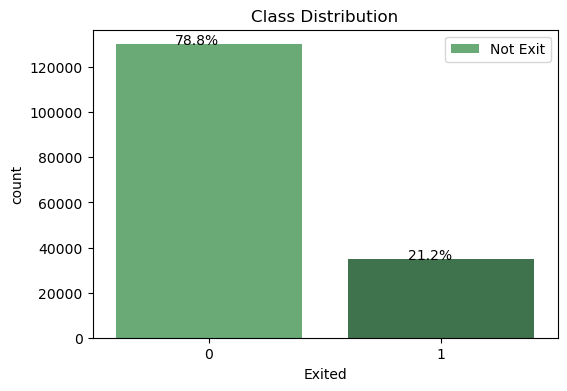

In [ ]:
# Customer Churn distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Exited', data=data, palette = 'Greens_d')
plt.title('Class Distribution')

# Calculate percentages and annotate
total = len(data['Exited'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

# Add legend
plt.legend(labels=['Not Exit', 'Exit'])

# Saving the plot
plt.savefig('bank_churn_distribution.png')
plt.show()


The distribution of the target variable Exited indicates that approximately 21% of customers have churned, which is our primary interest for further analysis.

#### Distributions of Numeric Features

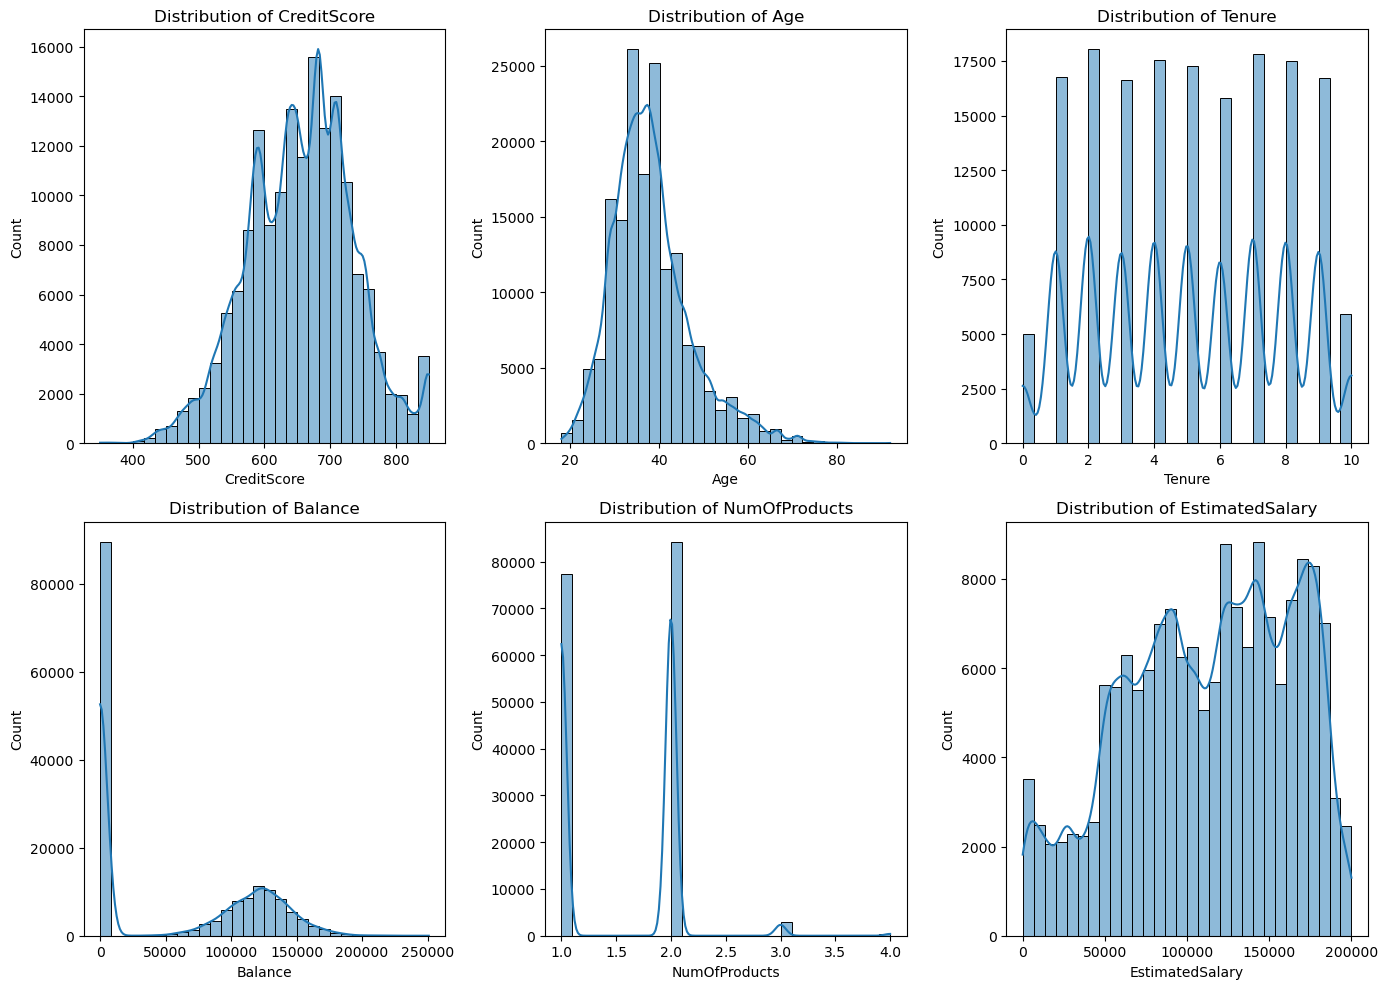

In [ ]:
# Distribution of numeric features: 'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'
fig, axs = plt.subplots(2, 3, figsize=(14, 10))  # 2 rows and 3 columns

numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for i, feature in enumerate(numeric_features):
    row, col = divmod(i, 3)  # Correctly calculate row and column for a 2x3 grid
    sns.histplot(train_df[feature], bins=30, ax=axs[row, col], kde=True)
    axs[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()

# Saving the plot
plt.savefig('numeric_features_distribution_corrected.png')
plt.show()

#### CreditScore, Age, Balance, Tenure, Num of products and EstimatedSalary:
The distributions of these features show varied patterns. For instance, the age distribution is slightly right-skewed, indicating a higher number of younger customers. The balance feature has a significant spike at zero, highlighting a large number of customers with no bank balance.

#### Analyzing Categorical Features

'Plots saved to categorical_features_distribution_2_in_row.png.'

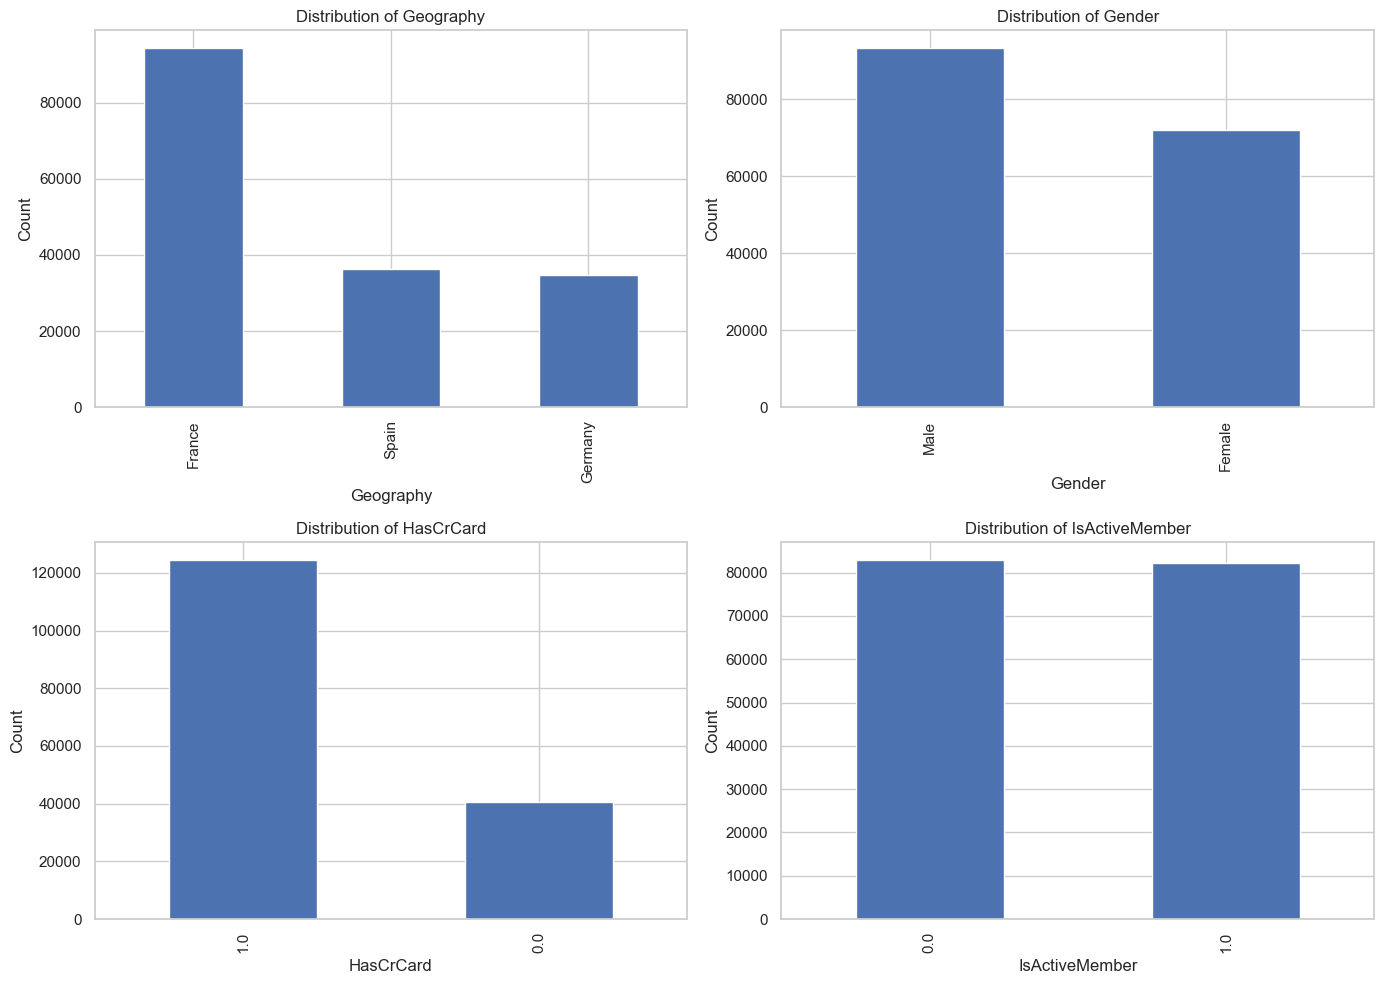

In [ ]:
# Adjusting the code to fit a 3x2 layout, plotting 2 plots in a row as requested
sns.set(style="whitegrid")  # Resetting aesthetics

# Initialize a figure for subplots with a 3x2 grid to fit 2 plots in a row
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Adjusted to 3 rows and 2 columns for 2 in a row

# Categorical features to analyze
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
#colors = ['blue', 'orange', 'lightgreen', 'red']  # Specify different colors for each plot

# Loop through each categorical feature to generate plots
for i, feature in enumerate(categorical_features):
    row, col = divmod(i, 2)  # Adjusted for 3x2 grid, placing 2 in a row
    train_df[feature].value_counts().plot(kind='bar', ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Count')

# Since we have exactly 4 features to plot, there's no need to hide any subplot
plt.tight_layout()

# Saving the plots to a file
fig.savefig('categorical_features_distribution_2_in_row.png')

# Display confirmation message
'Plots saved to categorical_features_distribution_2_in_row.png.'


- ### BIVARIATE ANALYSIS

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


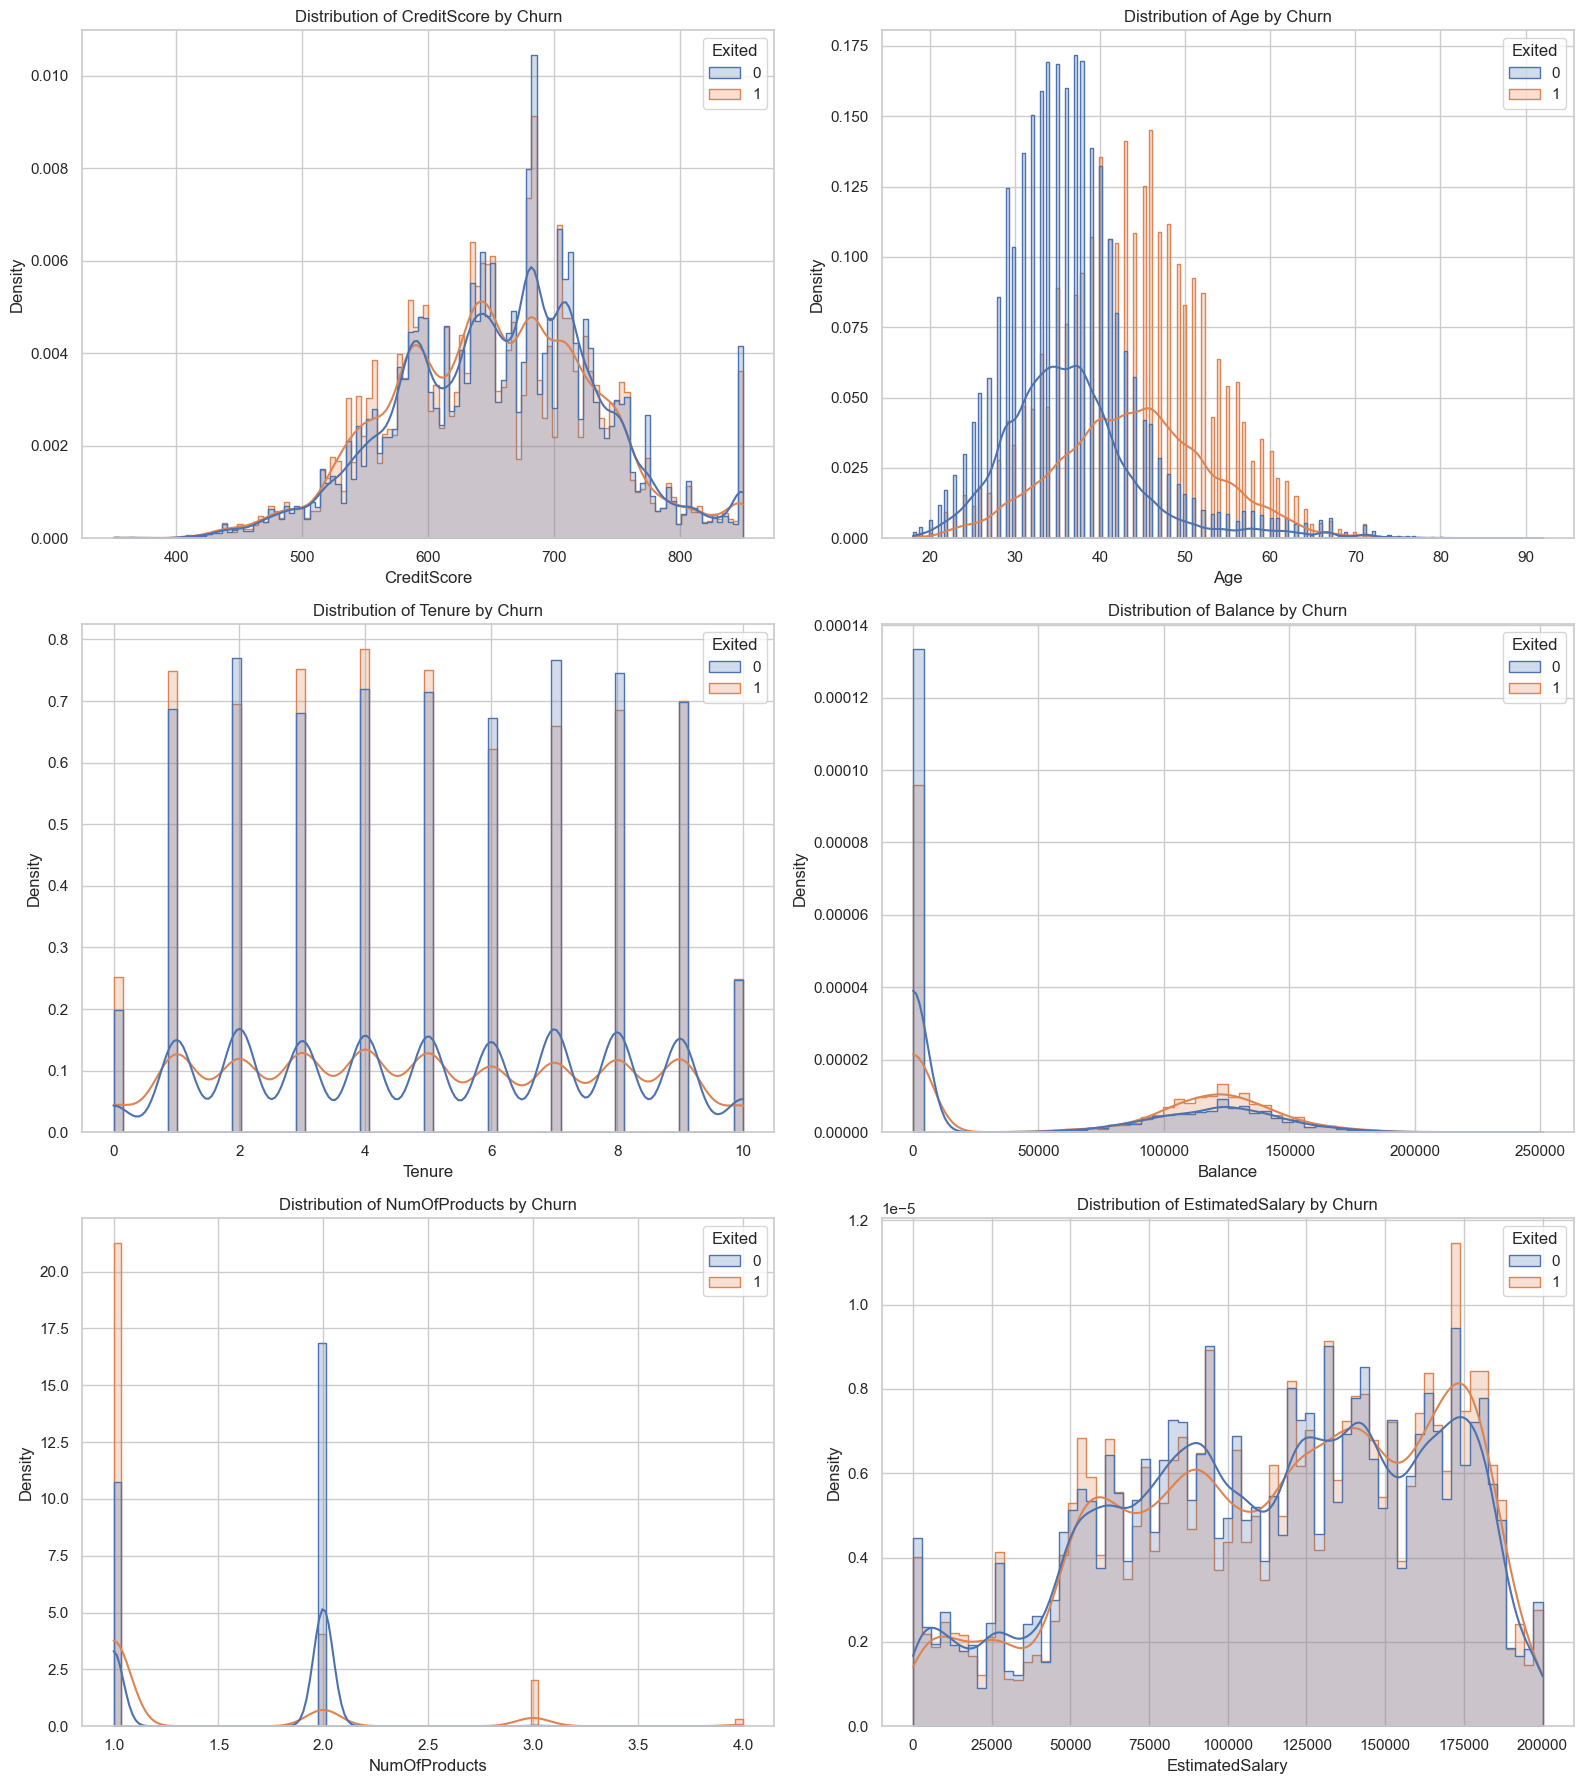

In [ ]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Initialize a figure for subplots with a 3x2 grid
fig, axs = plt.subplots(3, 2, figsize=(16, 18))
axs = axs.flatten()  # Flatten the array for easier iteration

# Numerical features to analyze
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Generate plots in subplots
for i, feature in enumerate(numerical_features):
    sns.histplot(data=train_df, x=feature, hue="Exited", element="step", stat="density", common_norm=False, kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {feature} by Churn')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Density')

# Adjust layout and remove any extra subplots if the number of features is not a multiple of the subplot grid size
for i in range(len(numerical_features), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()

# Saving the plot
plt.savefig('numerical_features_distribution_by_churn.png')
plt.show()


'Plots saved to churn_rate_by_category.png.'

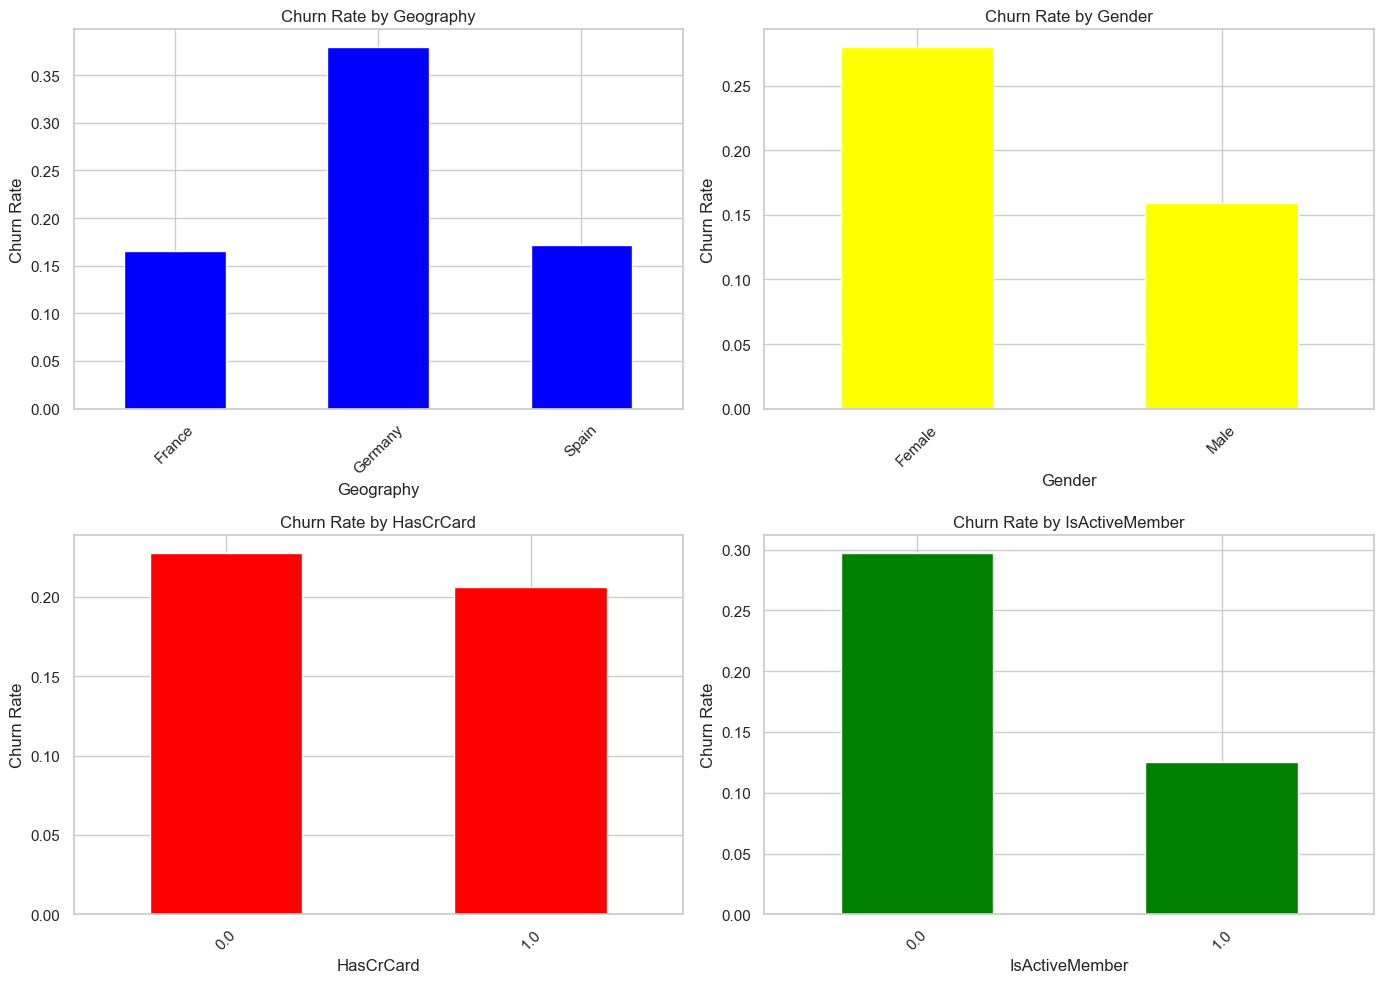

In [ ]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Initialize a figure for subplots with a 3x2 grid to fit 2 plots in a row
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Adjusted to 3 rows and 2 columns

# Categorical features to analyze
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
colors = ['blue', 'yellow', 'red', 'green']  # Specify different colors for each plot

# Loop through each categorical feature to generate plots
for i, feature in enumerate(categorical_features):
    row, col = divmod(i, 2)  # Adjusted for 3x2 grid, placing 2 in a row
    churn_rate = train_df.groupby(feature)['Exited'].mean()
    churn_rate.plot(kind='bar', ax=axs[row, col], color=colors[i])
    axs[row, col].set_title(f'Churn Rate by {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Churn Rate')
    axs[row, col].set_xticklabels(axs[row, col].get_xticklabels(), rotation=45)

# # Since you have exactly 4 features and a 3x2 grid, the last subplot will be empty, so hide it
# fig.delaxes(axs[2][1])

plt.tight_layout()

# Save the plots to a file. Adjust the path as per your local filesystem or environment
fig.savefig('churn_rate_by_category.png')

# Display confirmation message
'Plots saved to churn_rate_by_category.png.'


#### Churn Rate by Geography
- There are noticeable differences in churn rates among the different geographical regions, suggesting that location significantly impacts customer retention.

#### Churn Rate by Gender
- The churn rate varies between genders, indicating gender might play a role in customer churn.

#### Churn Rate by Credit Card Ownership (HasCrCard)
- Credit card ownership appears to have a minimal impact on churn rate, with both groups (card owners and non-owners) showing similar churn rates.

#### Churn Rate by Active Membership (IsActiveMember)
- Active membership status shows a strong correlation with churn rate, where inactive members have a higher churn rate compared to active members

### Finding Outliers

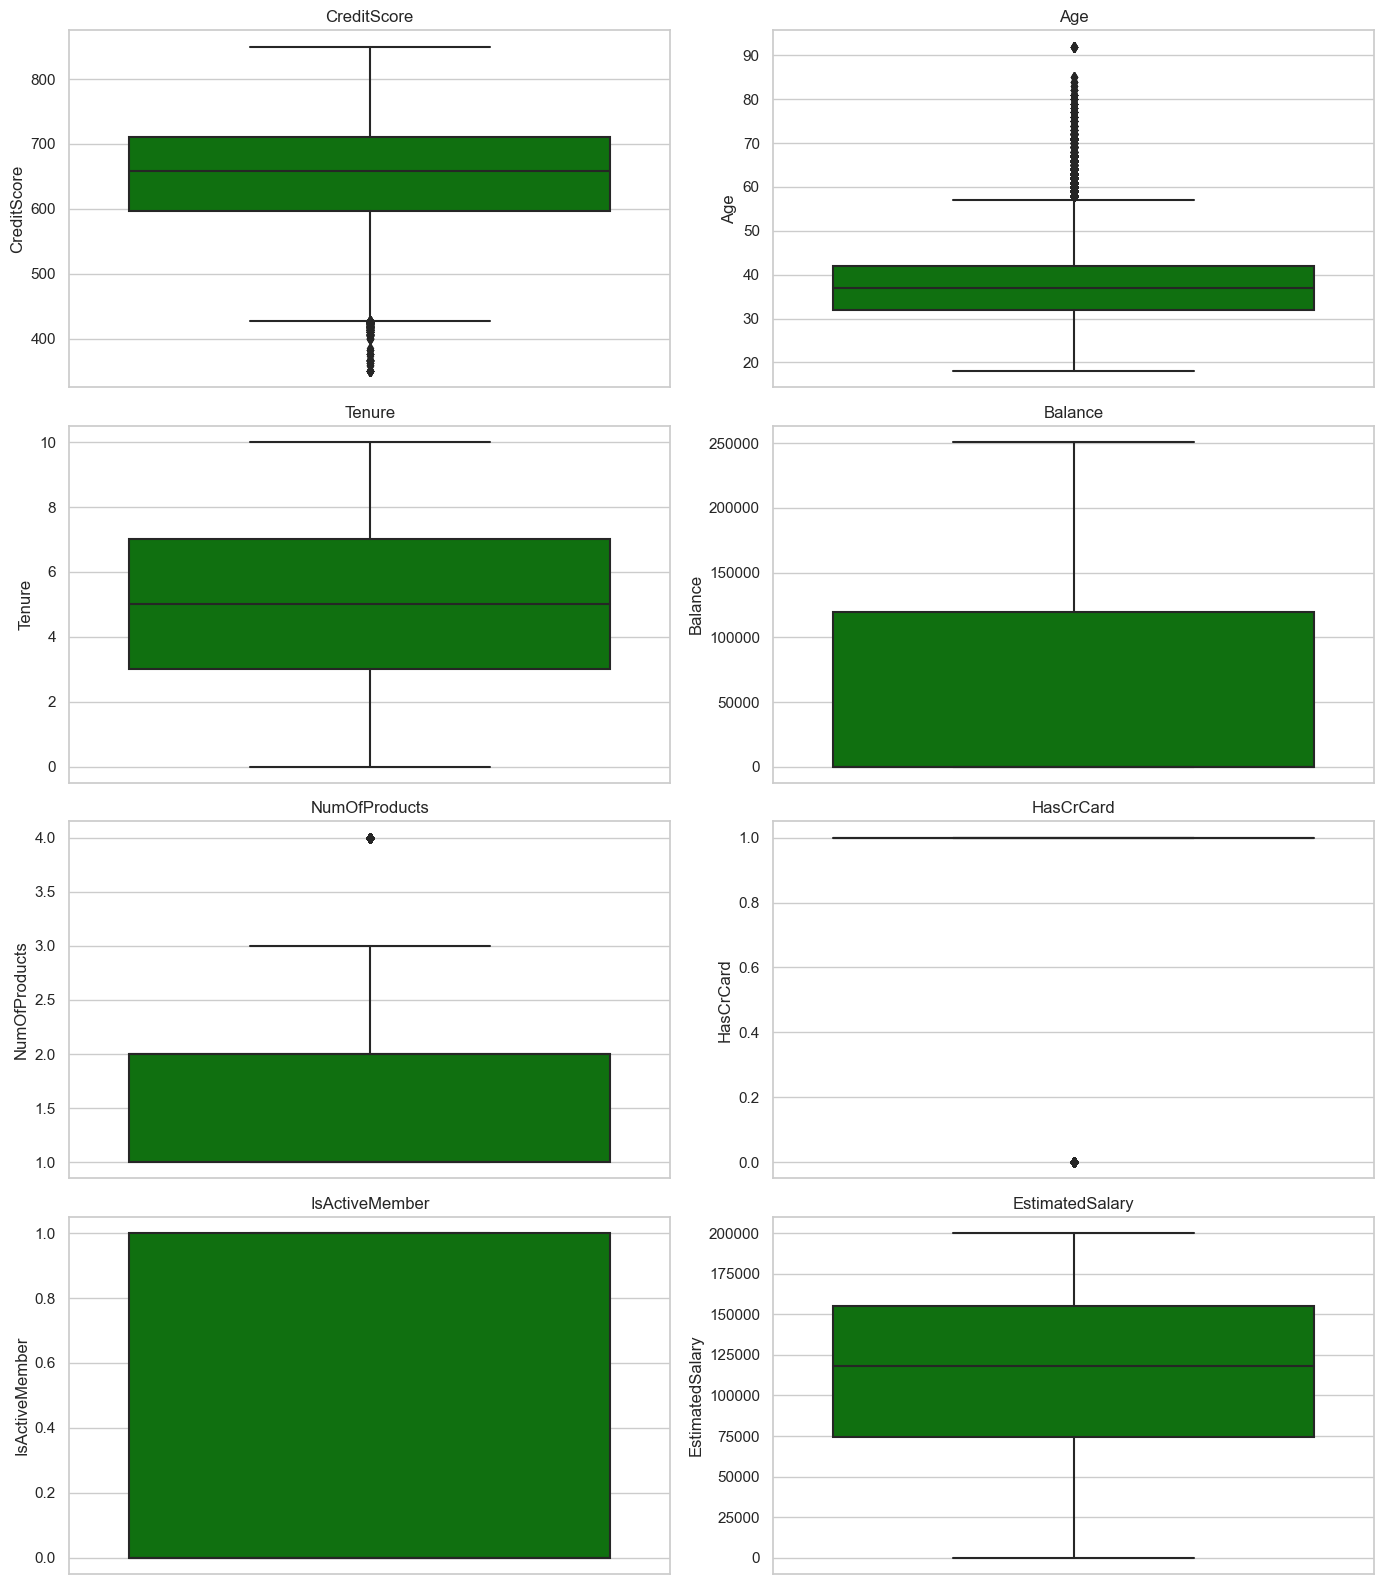

In [ ]:
# Ensure data is a DataFrame
data = pd.DataFrame(data)

# Drop the 'Exited' column from the DataFrame
data_without_target = data.drop('Exited', axis=1)

# Filter only numeric columns for boxplot
numeric_cols = data_without_target.select_dtypes(include=['float64', 'int64']).columns

# Boxplots for each numeric feature in a 4x2 grid
num_columns = len(numeric_cols)
num_rows = (num_columns + 1) // 2  # Calculate the number of rows needed, adjust for 2 columns per row

fig, axs = plt.subplots(num_rows, 2, figsize=(14, num_rows * 4))  # Adjust figsize as needed
axs = axs.flatten()  # Flatten to easily iterate over

for i, column in enumerate(numeric_cols):
    sns.boxplot(y=data_without_target[column], ax=axs[i], color='green')
    axs[i].set_title(column)

# Hide any extra subplots not used
for j in range(i+1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()

# Saving the plot
fig.savefig('numeric_features_boxplots.png')
plt.show()


### Identify Correlation in data

In [ ]:
# check for correlation
mat_corr = data.corr()
mat_corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.008918,0.000942,0.006973,0.011361,-0.002828,0.014790,-0.001820,-0.027383
Age,-0.008918,1.000000,-0.010830,0.064318,-0.102195,-0.012111,0.003320,-0.005399,0.340768
Tenure,0.000942,-0.010830,1.000000,-0.009481,0.007335,0.005327,-0.005532,0.000971,-0.019565
Balance,0.006973,0.064318,-0.009481,1.000000,-0.361033,-0.018584,-0.015073,0.008586,0.129743
NumOfProducts,0.011361,-0.102195,0.007335,-0.361033,1.000000,0.005482,0.039736,-0.004285,-0.214554
HasCrCard,-0.002828,-0.012111,0.005327,-0.018584,0.005482,1.000000,-0.021034,0.004438,-0.022141
IsActiveMember,0.014790,0.003320,-0.005532,-0.015073,0.039736,-0.021034,1.000000,-0.008080,-0.210237
EstimatedSalary,-0.001820,-0.005399,0.000971,0.008586,-0.004285,0.004438,-0.008080,1.000000,0.018827
Exited,-0.027383,0.340768,-0.019565,0.129743,-0.214554,-0.022141,-0.210237,0.018827,1.000000


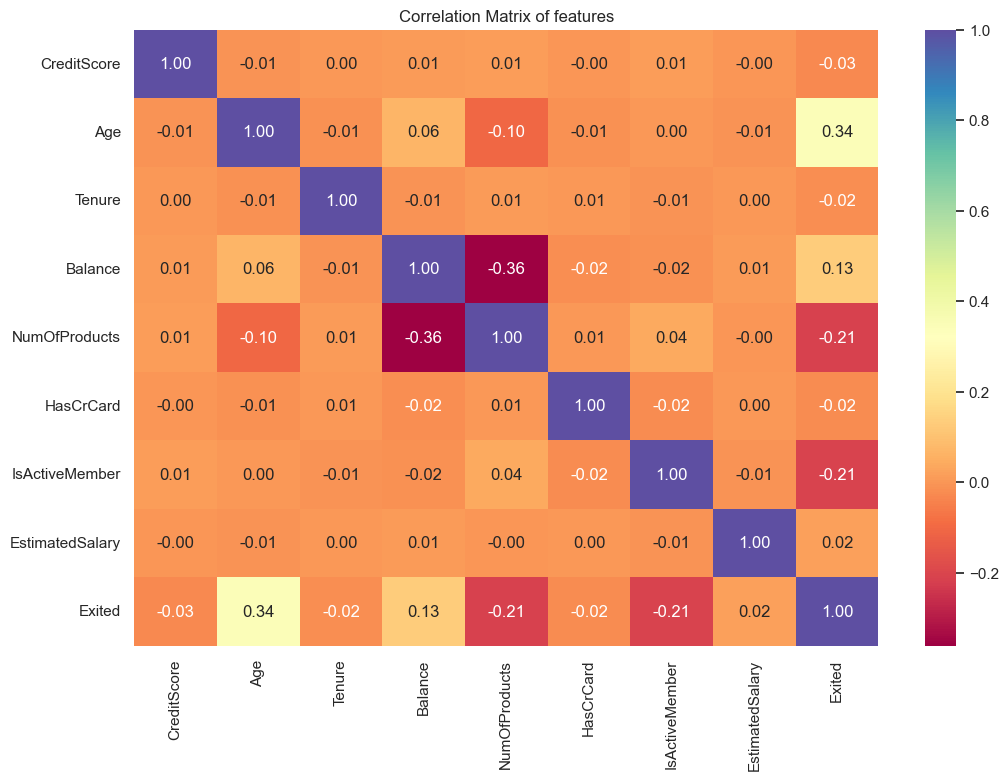

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='Spectral')
plt.title("Correlation Matrix of features")
plt.show()


#### Correlation Between Features and the Target ('Exited')
- CreditScore and Exited: The correlation is very weakly negative (-0.027383), suggesting almost no linear relationship between a customer's credit score and their likelihood of churning.<br>
- Age and Exited: There's a moderate positive correlation (0.340768), indicating that older customers are more likely to churn than younger ones.<br>
- Tenure and Exited: Very weakly negative correlation (-0.019565), suggesting tenure has a minimal impact on churn.<br>
- Balance and Exited: A positive correlation (0.129743) suggests customers with higher balances are slightly more likely to churn, though the relationship is not strong.<br>
- NumOfProducts and Exited: There's a moderate negative correlation (-0.214554), indicating that customers using more bank products are less likely to churn.<br>
- HasCrCard and Exited: Very weakly negative correlation (-0.022141), indicating having a credit card has a minimal direct impact on churn.<br>
- IsActiveMember and Exited: Moderate negative correlation (-0.210237) suggests that active members are less likely to churn.<br>
- EstimatedSalary and Exited: Very weak positive correlation (0.018827), indicating almost no linear relationship between a customer's estimated salary and their <br>

#### Implications
Age, NumOfProducts, and IsActiveMember are the most significant predictors of customer churn, with age being positively correlated and the latter two negatively correlated with churn. This suggests strategies focused on younger demographics, promoting the use of multiple products, and enhancing membership engagement could be effective in reducing churn.

The weak correlations between most features suggest that there are no strong linear dependencies among these customer attributes, which is beneficial for building predictive models since it reduces the concern over multicollinearity.

#### Conclusions
Customer Engagement: Enhancing customer engagement and satisfaction, especially among older customers, could significantly reduce churn rates. Tailored communication, personalized financial advice, and services that cater to the changing needs of the older demographic could be beneficial.

Product Penetration: Encouraging customers to use multiple products can increase their stickiness and reduce churn. Strategies to cross-sell and upsell, by highlighting the benefits of additional products or services, should be prioritized.

Digital Adoption: Given the potential for digital banking to alienate less tech-savvy, typically older, customers, a dual approach that combines technological innovation with robust support for traditional banking channels might be necessary.

Targeted Retention Strategies: Data suggests that specific customer segments are more prone to churn. Tailored retention strategies that address the unique needs and preferences of these segments could be more effective than a one-size-fits-all approach.